# Exploratory Data Analysis

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import os
import nltk
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import *
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
from collections import Counter
import seaborn as sns
import string
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df_all = pd.read_csv('/Users/natalipeeva/Desktop/Data/questions.csv')

In [3]:
df_trans_links = pd.read_csv('/Users/natalipeeva/Desktop/Data/Questions_links_translations.csv')

In [4]:
df_all.head()

,Year,Month,Question,Answer,Document,URLs
0,2018,12,\n \n1. Heeft het college kennisgenomen van de...,\nNee.,https://amsterdam.raadsinformatie.nl/document/...,NaN
1,2018,12,\n \n2. Kan het college bevestigen of dit lesm...,"\nNee, het college heeft hier geen zicht op. ...",https://amsterdam.raadsinformatie.nl/document/...,NaN
2,2018,12,\n \n ...,\nHet CIDI is duidelijk over de eigen doelste...,https://amsterdam.raadsinformatie.nl/document/...,NaN
3,2018,12,\n \n4. Is het college bekend met de jaarlijks...,\nHet college heeft hier kennis van genomen.,https://amsterdam.raadsinformatie.nl/document/...,NaN
4,2018,12,\n \na. Is het college van oordeel dat het CID...,vraag 4a: \nHet college is voor een pluriform...,https://amsterdam.raadsinformatie.nl/document/...,NaN


<AxesSubplot:>

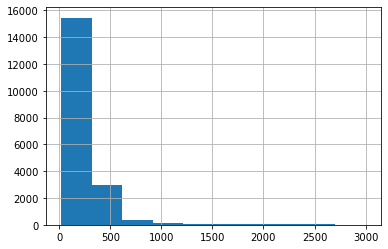

In [5]:
df_all['Question'].str.len().hist()

<AxesSubplot:>

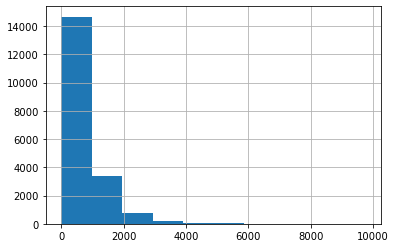

In [6]:
df_all['Answer'].str.len().hist()

<AxesSubplot:>

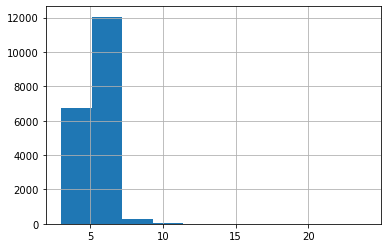

In [7]:
# Avg word len question
df_all['Question'].dropna().str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

In [8]:
df_trans_links.head()

,Unnamed: 0,Year,Month,Question,Answer,Document,URLs,Translated Questions,Translated Answers
0,9,2015,1,\n1. Komt het in Amsterdam al voor dat er gesu...,\nMomenteel vindt er geen gemeentelijk taalaa...,https://amsterdam.raadsinformatie.nl/document/...,http://www.parool.nl/parool/nl/4060/AMSTERDAM-...,1. Does it already happen in Amsterdam that su...,Currently there is no municipal language offer...
1,25,2013,6,\n1. Is het college op de hoogte van het rappo...,"\nJa, het college heeft kennisgenomen van het...",https://amsterdam.raadsinformatie.nl/document/...,http://www.dekinderombudsman.nl/86/volwassen/n...,1. Is the Board aware of the report of the Omb...,"Yes, the Board has taken note of the report. T..."
2,92,2013,9,\n1. Heeft het college kennisgenomen van de be...,\nJa. \n ...,https://amsterdam.raadsinformatie.nl/document/...,http://afvalonline.nl/bericht?id=17424\nhttp:/...,1. Has the Commission taken note of the report...,Yes.\n ...
3,101,2013,7,\n6. Wat gaat het college doen om ervoor te zo...,\nEen klas van 28 leerlingen wordt niet als i...,https://amsterdam.raadsinformatie.nl/document/...,http://www.rekenkamer.nl/Publicaties/Onderzoek...,6. What will the council do to ensure that the...,A class of 28 students is not considered an id...
4,117,2020,4,\n2. Wat doet de gemeente de komende weken om ...,\nNatuurlijke bestrijding \n- Er zijn...,https://amsterdam.raadsinformatie.nl/document/...,https://maps.amsterdam.nl/eikenprocessierups/,2. What will the municipality do about the num...,"Natural control\n- Approx. 3,000 bird nest box..."


# General idea

In [9]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19134 entries, 0 to 19133
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      19134 non-null  object
 1   Month     19128 non-null  object
 2   Question  19122 non-null  object
 3   Answer    19122 non-null  object
 4   Document  19122 non-null  object
 5   URLs      623 non-null    object
dtypes: object(6)
memory usage: 897.0+ KB


In [10]:
questions = df_all['Question']

In [11]:
answers = df_all['Answer']

# Pre-processing

In this section, the questions and answers are pre-processed. The pre-processing step is needed, so that the analysis is performed on data which has less noise (such as stopwords, punctuation etc.)

### Import stopwords

In [12]:
stop = stopwords.words('dutch')

### Tokenize

In [13]:
def tokenize(text):
    """
        Tokenizes the input text.
        Input: text - type(str)
        Output: a list of tokens - type(list)
    """
    tokens = word_tokenize(text, language='dutch')
    return tokens

### Stemming

In [14]:
def stem_token(token): # Doesn't work rn, should check how to do for Dutch
    """
        Stems the given token using the PorterStemmer from the nltk library
        Input: a single token
        Output: the stem of the token
    """
    stemmer = PorterStemmer()
    return stemmer.stem(token)

### Combined

In [18]:
# Define the process_text function
def process_text(text, stop_words, stem=False, remove_stopwords=False, lowercase_text=False):
    """
    Preprocesses the given text by tokenizing, removing stopwords, stemming, and lowercasing the text.
    Returns a list of preprocessed tokens.

    Args:
    - text (str): The input text to be preprocessed.
    - stop_words (list): A list of stopwords to be removed.
    - stem (bool): Whether to perform stemming.
    - remove_stopwords (bool): Whether to remove stopwords.
    - lowercase_text (bool): Whether to lowercase the text.

    Returns:
    - list: A list of preprocessed tokens.
    """
    tokens = []
    for token in tokenize(str(text)):
        if remove_stopwords and token.lower() in stop_words:
            continue
        if lowercase_text:
            token = token.lower()
        if stem:
            token = stem_word(token)
        tokens.append(token)
    return tokens

# Tokenize the text
def tokenize(text):
    """
    Tokenizes the given text.

    Args:
    - text (str): The input text to be tokenized.

    Returns:
    - list: A list of tokens.
    """
    tokens = word_tokenize(text, language='dutch')
    return tokens

# Usage example
questions_prepr = []
questions_len = []
for question in questions:
    preprocessed = process_text(question, stop, remove_stopwords=True, lowercase_text=True)
    questions_prepr.append(preprocessed)
    questions_len.append(len(preprocessed))


### Try

In [19]:
process_text(questions[0], stop, stem=False, remove_stopwords=True, lowercase_text=True)

['1', '.', 'college', 'kennisgenomen', 'genoemde', 'publicatie', 'cidi', '?']

# Lengths, Distributions, etc.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8adb519a60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8afa23a160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8adb519700>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8afa23a820>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8afa23ab80>],
 'means': []}

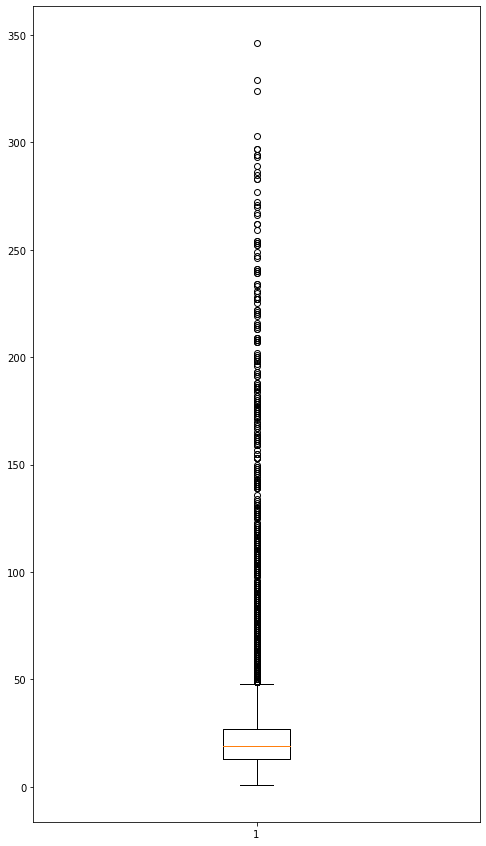

In [20]:
plt.figure(figsize=(8, 15))
plt.boxplot(questions_len)

In [21]:
answers_prepr = []
answers_len = []
for answer in answers:
    preprocessed = process_text(str(answer), stop, remove_stopwords=True, lowercase_text=True)
    answers_prepr.append(preprocessed)
    answers_len.append(len(preprocessed))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8ac98c7a30>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8ac98d6130>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8ac98c76d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8ac98d67f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8ac98d6b50>],
 'means': []}

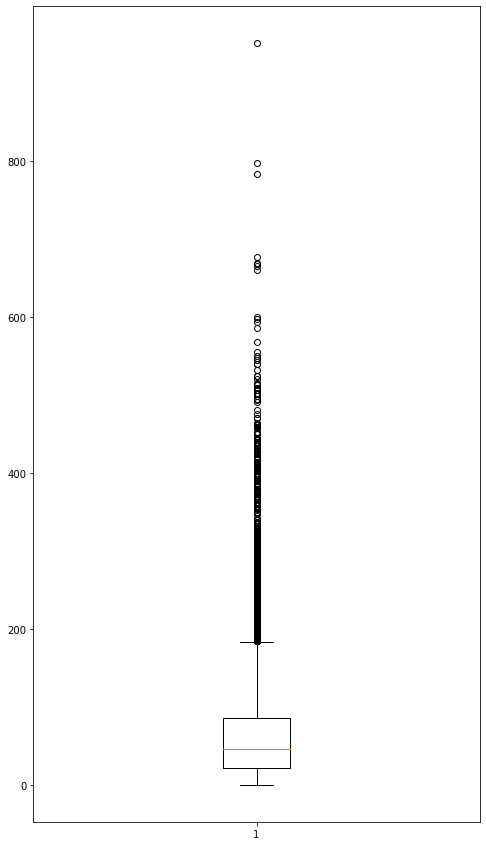

In [22]:
plt.figure(figsize=(8, 15))
plt.boxplot(answers_len)

### Most common words

#### Questions

In [23]:
corpus_q = sum(questions_prepr, [])

In [24]:
translator = str.maketrans('', '', string.punctuation)

# Remove punctuation
corpus_q = [token.translate(translator) for token in corpus_q if token not in string.punctuation]

<AxesSubplot:>

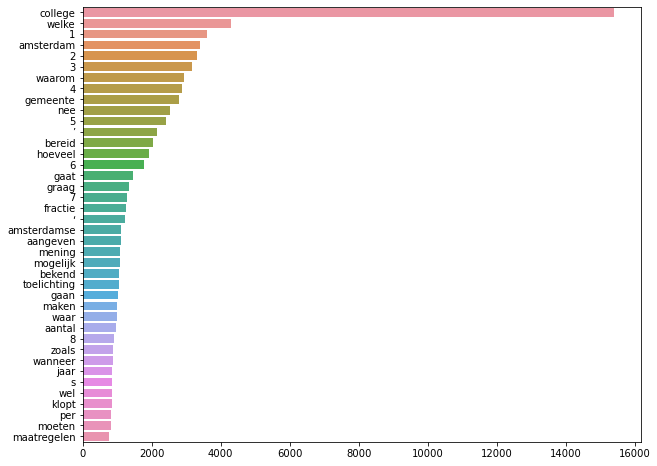

In [25]:
counter=Counter(corpus_q)
most=counter.most_common()

x, y= [], []
plt.figure(figsize=(10, 8))
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

#### Answers 

In [26]:
corpus_a = sum(answers_prepr, [])

translator = str.maketrans('', '', string.punctuation)

# Remove punctuation
corpus_a = [token.translate(translator) for token in corpus_a if token not in string.punctuation]

<AxesSubplot:>

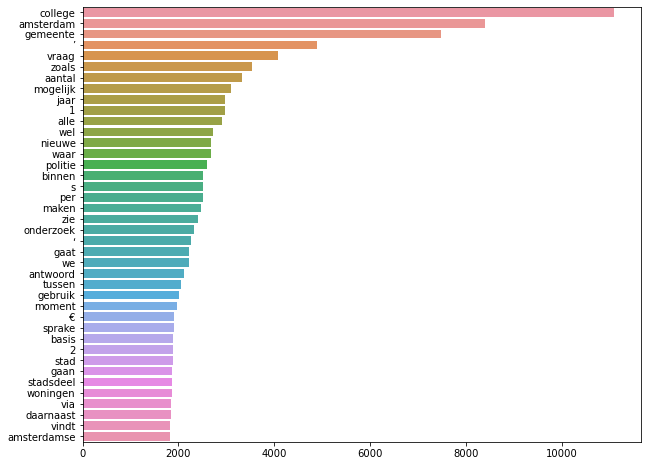

In [27]:
counter=Counter(corpus_a)
most=counter.most_common()

plt.figure(figsize=(10, 8))
x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

#### n-grams

In [28]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<AxesSubplot:>

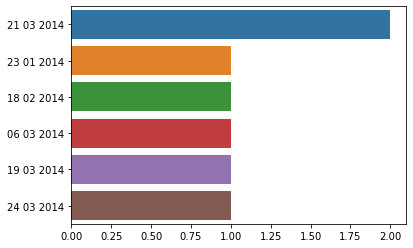

In [29]:
top_n_bigrams=get_top_ngram(corpus_q,3)
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

<AxesSubplot:>

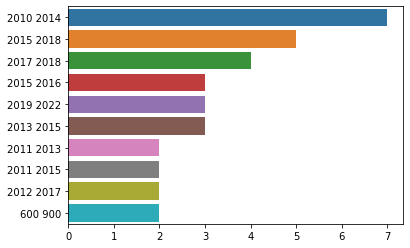

In [30]:
top_n_bigrams=get_top_ngram(corpus_a,2)
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

#### TF-IDF 

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

#### Questions

In [35]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'questions' is a pandas Series or DataFrame column
questions = df_all['Question'].fillna('')

# Create an instance of TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,3),
                             stop_words = stop,
                             max_df=0.6,
                             min_df=3)

# Fit-transform the questions
tfidf_q = vectorizer.fit_transform(questions)


In [37]:
feature_names = vectorizer.get_feature_names_out()
tf_idf_sum = tfidf_q.sum(axis=0)
tf_idf_scores = [(feature_names[i], tf_idf_sum[0, i]) for i in range(len(feature_names))]
tf_idf_scores = sorted(tf_idf_scores, key=lambda x: x[1], reverse=True)

# Print the top 10 most important words in the corpus
for term, score in tf_idf_scores[:10]:
    print(f"{term}: {score:.2f}")


welke: 352.70
amsterdam: 299.41
waarom: 266.16
gemeente: 252.39
nee: 227.07
hoeveel: 208.91
bereid: 198.69
nee waarom: 185.18
college bereid: 178.43
gaat: 154.82


#### Answers

In [38]:
answers.isnull().values.any()

True

In [39]:
answers.isnull().sum()

12

In [40]:
answers = answers.dropna()

In [41]:
vectorizer = TfidfVectorizer(ngram_range=(1,3),
                             stop_words = stop,
                             max_df=0.6,
                             min_df=3)
tfidf_a = vectorizer.fit_transform(answers)

In [43]:
feature_names = vectorizer.get_feature_names_out()
tf_idf_sum = tfidf_a.sum(axis=0)
tf_idf_scores = [(feature_names[i], tf_idf_sum[0, i]) for i in range(len(feature_names))]
tf_idf_scores = sorted(tf_idf_scores, key=lambda x: x[1], reverse=True)

# Print the top 10 most important words in the corpus
for term, score in tf_idf_scores[:10]:
    print(f"{term}: {score:.2f}")



college: 404.87
vraag: 352.70
zie: 324.44
amsterdam: 299.63
antwoord: 271.61
gemeente: 264.32
zie antwoord: 246.50
antwoord vraag: 244.51
zie antwoord vraag: 228.52
nee: 170.94


### Topic Modeling 

In [44]:
import gensim

In [45]:
nopunct_a = []
for answ in answers_prepr:
    nopunct_a.append([token.translate(translator) for token in answ if token not in string.punctuation])

In [46]:
dic=gensim.corpora.Dictionary(nopunct_a)
bow_corpus = [dic.doc2bow(doc) for doc in nopunct_a]

In [47]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 10,
                                   id2word = dic,
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.014*"college" + 0.009*"stadsdeel" + 0.006*"geïnformeerd" + 0.006*"raad" + 0.006*"brief" + 0.005*"amsterdam" + 0.005*"2019" + 0.005*"gemeente" + 0.005*"2015" + 0.005*"2020"'),
 (1,
  '0.008*"gemeente" + 0.007*"college" + 0.007*"per" + 0.006*"amsterdam" + 0.006*"jaar" + 0.005*"woningen" + 0.005*"’" + 0.004*"1" + 0.004*"2020" + 0.004*"aantal"'),
 (2,
  '0.013*"college" + 0.011*"politie" + 0.009*"gemeente" + 0.009*"amsterdam" + 0.007*"’" + 0.006*"onderzoek" + 0.005*"informatie" + 0.005*"aanpak" + 0.004*"ouders" + 0.004*"s"'),
 (3,
  '0.015*"woningen" + 0.015*"college" + 0.007*"corporaties" + 0.006*"amsterdam" + 0.006*"woning" + 0.005*"bewoners" + 0.005*"sociale" + 0.005*"huurwoningen" + 0.005*"zorg" + 0.005*"aantal"'),
 (4,
  '0.010*"’" + 0.007*"s" + 0.007*"aantal" + 0.006*"ruimte" + 0.005*"maatregelen" + 0.005*"amsterdam" + 0.005*"openbare" + 0.005*"bomen" + 0.005*"stadsdeel" + 0.005*"stad"'),
 (5,
  '0.018*"college" + 0.013*"gemeente" + 0.006*"amsterdam" + 0.005*"mogelijk" + 0.

0) 0.019*"district" + 0.012*"•" + 0.006*"Center" + 0.006*"hour" + 0.006*"Southeast" + 0.005*"residents" + 0.005*"North" + 0.005*"District" + 0.005* "West" + 0.004*"2020"')

1) 0.017*"Amsterdam" + 0.008*"college" + 0.006*"'" + 0.006*"municipality" + 0.004*"new" + 0.004*"Amsterdam" + 0.004*"city" + 0.004*"s" + 0.003* "like" + 0.003*"area

2) 0.018*"€" + 0.009*"college" + 0.008*"per" + 0.007*"Amsterdam" + 0.006*"costs" + 0.006*"1" + 0.006*"municipality" + 0.005*"2014" + 0.005* "year" + 0.005*"2015

3) '0.031*"question" + 0.021*"answer" + 0.019*"lecture" + 0.017*"See" + 0.011*"1" + 0.011*"municipality" + 0.009*"building" + 0.009*"2" + 0.008 *"Amsterdam" + 0.008*"answer"

4) 0.013*"homes" + 0.009*"college" + 0.006*"home" + 0.005*"number" + 0.005*"year" + 0.005*"residents" + 0.004*"municipality" + 0.004*"per" + 0.004* "corporations" + 0.004*"new"

In [48]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 20,
                                   id2word = dic,
                                   passes = 10,
                                   workers = 2)

In [49]:
lda_model.show_topics(10)

[(8,
  '0.027*"woningen" + 0.016*"college" + 0.011*"amsterdam" + 0.010*"corporaties" + 0.009*"gemeente" + 0.008*"woning" + 0.007*"huurders" + 0.007*"sociale" + 0.006*"afspraken" + 0.006*"aantal"'),
 (10,
  '0.012*"college" + 0.011*"’" + 0.011*"amsterdam" + 0.010*"gemeente" + 0.008*"s" + 0.006*"zoals" + 0.006*"handhaving" + 0.006*"gebruik" + 0.005*"openbare" + 0.005*"maatregelen"'),
 (5,
  '0.065*"vraag" + 0.052*"zie" + 0.045*"antwoord" + 0.020*"1" + 0.020*"2" + 0.018*"3" + 0.015*"beantwoording" + 0.012*"4" + 0.012*"vragen" + 0.009*"5"'),
 (17,
  '0.007*"v" + 0.006*"fonds" + 0.005*"oekraïne" + 0.005*"afvalstoffenheffing" + 0.004*"\uf0a7" + 0.004*"stichting" + 0.004*"casa" + 0.004*"rvp" + 0.004*"free" + 0.004*"emailadres"'),
 (18,
  '0.017*"jaar" + 0.012*"per" + 0.011*"aantal" + 0.010*"uur" + 0.008*"gebruik" + 0.007*"1" + 0.007*"totaal" + 0.005*"evenementen" + 0.005*"2016" + 0.005*"periode"'),
 (0,
  '0.010*"ymere" + 0.010*"stadgenoot" + 0.009*"windturbines" + 0.007*"bewoners" + 0.006*"a

In [50]:
nopunct_q = []
for q in questions_prepr:
    nopunct_q.append([token.translate(translator) for token in q if token not in string.punctuation])

In [51]:
dic=gensim.corpora.Dictionary(nopunct_q)
bow_corpus = [dic.doc2bow(doc) for doc in nopunct_q]

In [52]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 20,
                                   id2word = dic,
                                   passes = 10,
                                   workers = 2)

In [53]:
lda_model.show_topics(10)

[(0,
  '0.015*"" + 0.009*"motie" + 0.008*"3" + 0.008*"6" + 0.008*"erfpacht" + 0.007*"amsterdam" + 0.007*"−" + 0.007*"a" + 0.006*"college" + 0.006*"aangenomen"'),
 (15,
  '0.036*"college" + 0.025*"woningen" + 0.011*"sociale" + 0.007*"6" + 0.006*"huurwoningen" + 0.006*"bereid" + 0.006*"waarom" + 0.006*"3" + 0.006*"waar" + 0.005*"welke"'),
 (6,
  '0.025*"college" + 0.017*"vragen" + 0.017*"dieren" + 0.012*"1" + 0.011*"schriftelijke" + 0.009*"fractie" + 0.007*"partij" + 0.007*"2" + 0.007*"beantwoording" + 0.006*"wethouder"'),
 (14,
  '0.048*"college" + 0.034*"amsterdam" + 0.023*"gemeente" + 0.016*"4" + 0.011*"5" + 0.010*"waarom" + 0.010*"contact" + 0.010*"nee" + 0.010*"2" + 0.009*"bereid"'),
 (17,
  '0.016*"gemeente" + 0.012*"3" + 0.010*"opvang" + 0.010*"waarom" + 0.009*"1" + 0.008*"college" + 0.007*"2" + 0.007*"afspraken" + 0.006*"klopt" + 0.006*"•"'),
 (11,
  '0.073*"welke" + 0.034*"college" + 0.027*"maatregelen" + 0.011*"3" + 0.011*"nemen" + 0.010*"genomen" + 0.010*"5" + 0.010*"manier" +

### Locating Outliers 

#### Questions

In [54]:
df_all['Question Len'] = questions_len

In [55]:
df_all['Answer Len'] = answers_len

In [56]:
df_all.describe()

,Question Len,Answer Len
count,19134.000000,19134.000000
mean,24.040504,65.425003
std,22.891957,67.621178
min,1.000000,0.000000
25%,13.000000,21.000000
50%,19.000000,46.000000
75%,27.000000,86.000000
max,346.000000,951.000000


Mean is very different from the max values, which indicates outliers, regardless of the fact that mean is highly affected by extreme values. 

In [57]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    
    q3=df.quantile(0.75)
    
    IQR=q3-q1
    
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    
    return outliers

In [58]:
outliers_q = find_outliers_IQR(df_all['Question Len']).sort_values()

In [59]:
outliers_a = find_outliers_IQR(df_all['Answer Len']).sort_values()

In [60]:
print(len(outliers_q))
print(len(outliers_a))

1101
1069


The number of outliers for questions and answers is very similar -> it is likely that the same docs are not being parsed correctly 

In [61]:
outliers_q[-10:]

5243     289
11070    293
12889    294
4884     294
9829     297
10427    297
9745     303
5362     324
5675     329
8772     346
Name: Question Len, dtype: int64

In [62]:
outliers_a[-10:]

16969    598
1076     600
3515     660
17593    665
1419     668
13979    669
264      677
17313    783
9553     798
3857     951
Name: Answer Len, dtype: int64

After checking this answer might actually not be wrongly parsed. (Need to check in detail). -> The college seems to have answered all four questions in one answer 

### URLs inspection

In [63]:
df_trans_links.head()

,Unnamed: 0,Year,Month,Question,Answer,Document,URLs,Translated Questions,Translated Answers
0,9,2015,1,\n1. Komt het in Amsterdam al voor dat er gesu...,\nMomenteel vindt er geen gemeentelijk taalaa...,https://amsterdam.raadsinformatie.nl/document/...,http://www.parool.nl/parool/nl/4060/AMSTERDAM-...,1. Does it already happen in Amsterdam that su...,Currently there is no municipal language offer...
1,25,2013,6,\n1. Is het college op de hoogte van het rappo...,"\nJa, het college heeft kennisgenomen van het...",https://amsterdam.raadsinformatie.nl/document/...,http://www.dekinderombudsman.nl/86/volwassen/n...,1. Is the Board aware of the report of the Omb...,"Yes, the Board has taken note of the report. T..."
2,92,2013,9,\n1. Heeft het college kennisgenomen van de be...,\nJa. \n ...,https://amsterdam.raadsinformatie.nl/document/...,http://afvalonline.nl/bericht?id=17424\nhttp:/...,1. Has the Commission taken note of the report...,Yes.\n ...
3,101,2013,7,\n6. Wat gaat het college doen om ervoor te zo...,\nEen klas van 28 leerlingen wordt niet als i...,https://amsterdam.raadsinformatie.nl/document/...,http://www.rekenkamer.nl/Publicaties/Onderzoek...,6. What will the council do to ensure that the...,A class of 28 students is not considered an id...
4,117,2020,4,\n2. Wat doet de gemeente de komende weken om ...,\nNatuurlijke bestrijding \n- Er zijn...,https://amsterdam.raadsinformatie.nl/document/...,https://maps.amsterdam.nl/eikenprocessierups/,2. What will the municipality do about the num...,"Natural control\n- Approx. 3,000 bird nest box..."


In [64]:
urls = df_trans_links['URLs']

In [65]:
Counter(urls).most_common(17)

[('https://www.rijksoverheid.nl/documenten/kamerstukken/2021/07/06/kamerbrief-over-de-gevolgen-van-de-uitspraak-van-de-raad-van-state-over-de-milieubeoordeling-voor-\nhttps://www.infomil.nl/onderwerpen/integrale/uitspraak-raad-state/gevolgen-raad-state-uitspraak-windturbineparken/uitspraak-raad-state/',
  5),
 ('https://www.ggd.amsterdam.nl/gezond-wonen/loden-waterleidingen/meest-gestelde-vragen-over-gezondheid-en/',
  2),
 ('https://www.regionale-energiestrategie.nl/vragen/vragen', 2),
 ('https://www.amsterdam.nl/bestuur-organisatie/volg-beleid/stad-in-balans/geluidsoverlast/',
  2),
 ('https://www.rvo.nl/onderwerpen/duurzaam-ondernemen/duurzame-energie-opwekken/windenergie-op-land/milieu-en-omgeving/natuur-en-',
  2),
 ('https://www.jaarverantwoordingzorg.nl/gegevens-bekijken/verantwoordingsgegevens-per-instelling',
  2),
 ('https://www.amsterdam.nl/zorg-ondersteuning/contact/meldpunt-zorg/', 2),
 ('https://www.cbs.nl/nl-nl/corporate/2019/32/onderzoek-naar-eerlijke-algoritmen-voor-be

Check if the ones that appear more than once are connectes to the same documents/ or if there is a mistake

**e.g. the most common link seems to be a mistake (It looks like 2 links are combined together)**

### Check broken links

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
broken_links=[]
for url in urls:
    try:
        r = requests.head(url)
        if r.status_code == 404:
            broken_links.append(url)
    except requests.exceptions.ConnectionError:
        broken_links.append('Connection refused')
    except requests.exceptions.InvalidURL:
            broken_links.append('Invalid URL')

In [ ]:
len(broken_links)

There are (maybe) 143 broken/not accessible links 

In [ ]:
mask = df_trans_links['URLs'].isin(broken_links) # doesn't check for "Connection refused"

In [ ]:
index_list = df_trans_links[mask].index.tolist()
index_list

In [ ]:
df_trans_links.iloc[index_list].to_csv('broken links.csv') # create csv

### Save Questions and answers 

#### Outliers

In [67]:
outliers_q = find_outliers_IQR(df_all['Question Len']).sort_values(ascending=False)

In [68]:
df_all.iloc[outliers_q.index].to_csv('question_outliers.csv') # questions 

In [69]:
outliers_a = find_outliers_IQR(df_all['Answer Len']).sort_values(ascending=False)

In [70]:
df_all.iloc[outliers_a.index].to_csv('answer_outliers.csv') # questions 

### Links fix the ones that appear on new lines

In [ ]:
index = 0
question_url = dict()
for l in df_trans_links['URLs']:
    question_url[df_trans_links['Question'][index]] = df_trans_links['URLs'][index].split('\n')
    
    index+=1
    

In [ ]:
links = list(question_url.values())

In [ ]:
flattened_list = [item for sublist in links for item in sublist]

In [ ]:
broken_links2=[]
for url in flattened_list:
    try:
        r = requests.head(url)
        if r.status_code == 404:
            broken_links.append(url)
    except requests.exceptions.ConnectionError:
        broken_links.append('Connection refused')
    except requests.exceptions.InvalidURL:
            broken_links.append('Invalid URL')

In [ ]:
broken_links2

In [ ]:
broken_links2=[]
for url in flattened_list:
    try:
        r = requests.head(url)
        if r.status_code == 404:
            broken_links2.append(url)
    except requests.exceptions.ConnectionError:
        broken_links2.append('Connection refused')
    except requests.exceptions.InvalidURL:
            broken_links2.append('Invalid URL')

In [ ]:
broken_links2